In [93]:
#Importing all the libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
%matplotlib inline
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [2]:
def ma_generator(data, short_MA, long_MA):
    ema_short = data.ewm(span=short_MA, adjust=False).mean()
    sma_short = data.rolling(short_MA).mean()
    ema_long = data.ewm(span=long_MA, adjust=False).mean()
    sma_long = data.rolling(long_MA).mean()
    return ema_short, sma_short, ema_long, sma_long

# S&P500 data

In [3]:
#Initializer
short_MA = 50
long_MA = 200
start_date = '20120531'
end_date = '20220527'

In [4]:
#Data reading & cleaning
equity_df = pd.read_csv("spy.csv", error_bad_lines = False)
date = equity_df["Date"].to_list()
equity_df.drop(equity_df.columns[0], axis=1, inplace=True)
equity_df.set_index("Date", inplace=True)
#equity_df.index.name = None
equity_df

,SPY
Date,
2012-05-31,108.692978
2012-06-01,105.956421
2012-06-04,105.906792
2012-06-05,106.708755
2012-06-06,109.106346
...,...
2022-05-23,396.920013
2022-05-24,393.890015
2022-05-25,397.369995


In [5]:
ema_short, sma_short, ema_long, sma_long = ma_generator(equity_df, short_MA, long_MA)

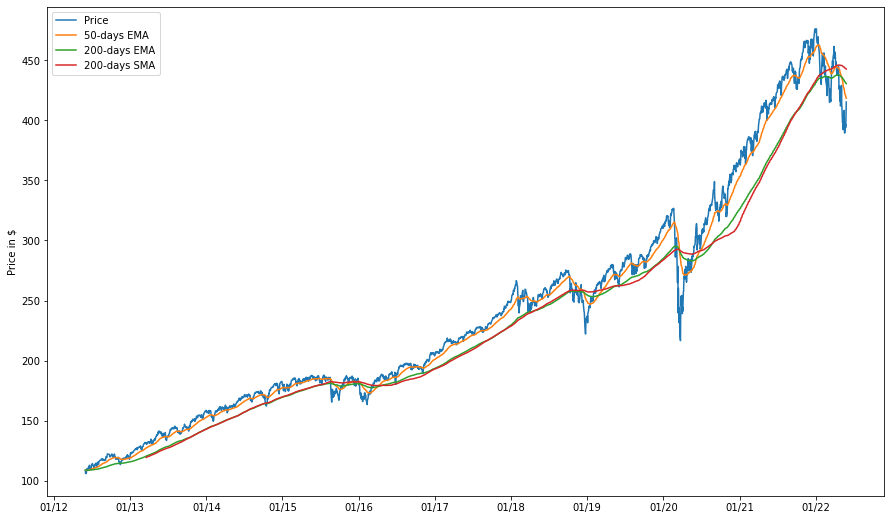

In [45]:
date_index = pd.to_datetime(equity_df.loc[:].index, format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(15,9))


ax.plot(date_index, equity_df.loc[:], label='Price')
ax.plot(date_index, ema_short.loc[:], label = '50-days EMA')
ax.plot(date_index, ema_long.loc[:], label = '200-days EMA')
ax.plot(date_index, sma_long.loc[:], label = '200-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [69]:
trading_positions_raw = equity_df - ema_long
trading_positions_raw[trading_positions_raw < 0] = 0
trading_positions_raw[trading_positions_raw > 0] = 1
trading_positions = trading_positions_raw
# trading_positions = trading_positions_raw.apply(np.sign) 

trading_positions_final = trading_positions.shift(1)
trading_positions_final

,SPY
Date,
2012-05-31,NaN
2012-06-01,0.0
2012-06-04,0.0
2012-06-05,0.0
2012-06-06,0.0
...,...
2022-05-23,0.0
2022-05-24,0.0
2022-05-25,0.0


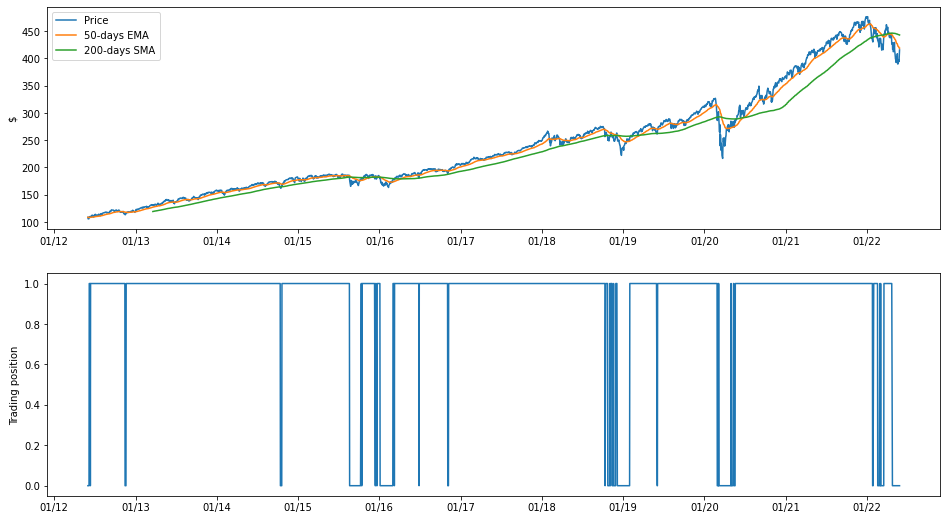

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, equity_df.loc[:], label='Price')
ax1.plot(date_index, ema_short.loc[:], label = '50-days EMA')
ax1.plot(date_index, sma_long.loc[:], label = '200-days SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final, label='Trading position')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [71]:
asset_log_returns = np.log(equity_df).diff()
raw_return = asset_log_returns*trading_positions_final
cum_return = raw_return.cumsum()
rel_cum_return = np.exp(cum_return) - 1
rel_cum_return

,SPY
Date,
2012-05-31,NaN
2012-06-01,0.000000
2012-06-04,0.000000
2012-06-05,0.000000
2012-06-06,0.000000
...,...
2022-05-23,1.892237
2022-05-24,1.892237
2022-05-25,1.892237


In [72]:
hold_return = asset_log_returns*1

hold_cum_return = hold_return.cumsum()
rel_hold_cum_return = np.exp(hold_cum_return) - 1

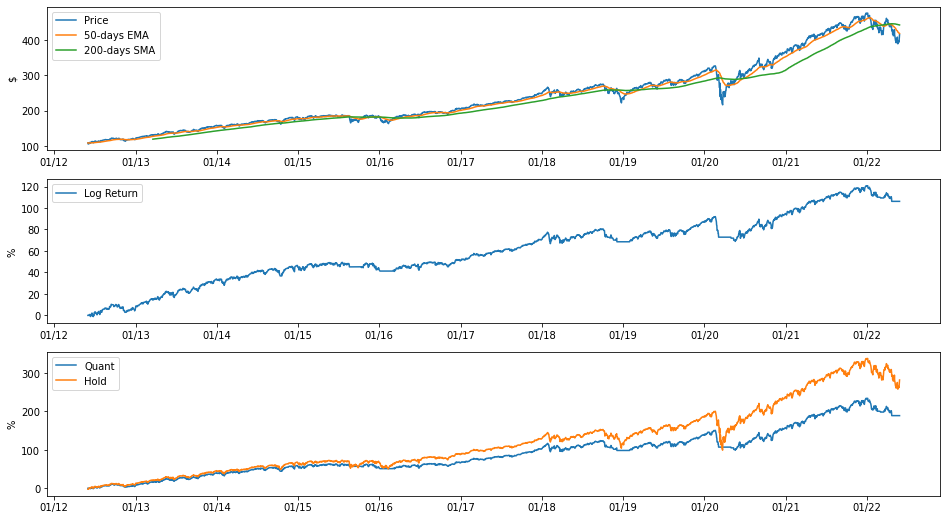

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,9))

ax1.plot(date_index, equity_df.loc[:], label='Price')
ax1.plot(date_index, ema_short.loc[:], label = '50-days EMA')
ax1.plot(date_index, sma_long.loc[:], label = '200-days SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, 100*cum_return, label="Log Return")

ax2.set_ylabel('%')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

ax3.plot(date_index, 100*rel_cum_return, label="Quant")
ax3.plot(date_index, 100*rel_hold_cum_return, label="Hold")

ax3.set_ylabel('%')
ax3.legend(loc='best')
ax3.xaxis.set_major_formatter(my_year_month_fmt)

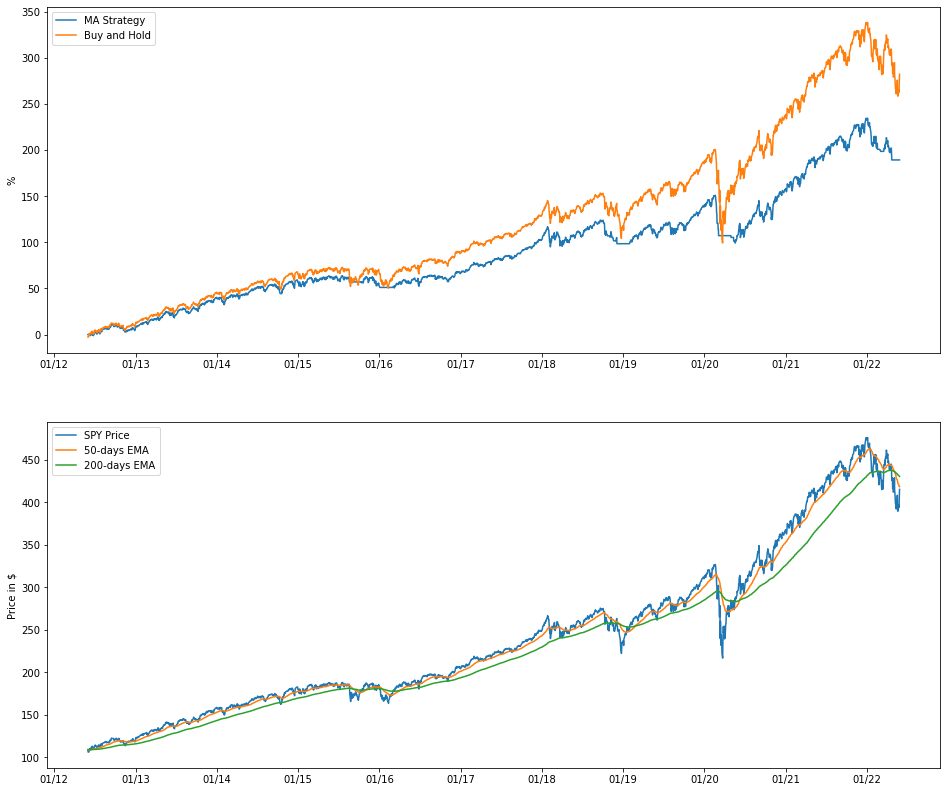

In [74]:
date_index = pd.to_datetime(equity_df.loc[:].index, format='%Y-%m-%d')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,14))


ax1.plot(date_index, 100*rel_cum_return, label="MA Strategy")
ax1.plot(date_index, 100*rel_hold_cum_return, label="Buy and Hold")

ax1.legend(loc='best')
ax1.set_ylabel('%')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, equity_df.loc[:], label='SPY Price')
ax2.plot(date_index, ema_short.loc[:], label = '50-days EMA')
ax2.plot(date_index, ema_long.loc[:], label = '200-days EMA')


ax2.legend(loc='best')
ax2.set_ylabel('Price in $')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

# FX data

In [441]:
#Data reading & cleaning
fx_df = pd.read_csv("fx.csv", error_bad_lines = False)
fx_df['Date'] = pd.to_datetime(fx_df["Date"], format='%Y-%m-%d')
date = fx_df["Date"].to_list()
fx_df.drop(fx_df.columns[0], axis=1, inplace=True)
fx_df.set_index("Date", inplace=True)
#fx_df = fx_df[(np.abs(stats.zscore(fx_df)) < 3).all(axis=1)]
fx_df = fx_df.mask(fx_df.sub(fx_df.mean()).div(fx_df.std()).abs().gt(2))
fx_df

,ALL=X,DZD=X,XCD=X,BDT=X,BZD=X,INR=X,BOB=X,BWP=X,NOK=X,BIF=X,...,THBCHF=X,TTDUSD=X,TRYUSD=X,UGXUSD=X,UAHUSD=X,AEDNZD=X,AEDJPY=X,AEDZAR=X,UYUUSD=X,VNDUSD=X
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-31,110.430000,76.124001,2.6882,80.821999,NaN,56.228001,NaN,NaN,6.08550,1392.900024,...,0.030450,0.158803,0.539084,0.000407,NaN,0.361510,NaN,2.323000,0.050320,0.000049
2012-06-01,110.459999,76.216003,2.6882,80.655998,NaN,56.077999,NaN,NaN,6.11320,1380.199951,...,0.030540,0.160674,0.536394,0.000409,NaN,0.361420,NaN,2.312900,0.050279,0.000049
2012-06-04,109.570000,76.830002,2.6882,79.943001,NaN,55.537998,6.788500,NaN,6.12898,1385.699951,...,0.030550,0.160046,0.537895,0.000409,NaN,0.360570,NaN,2.339900,0.050078,0.000049
2012-06-05,109.070000,76.532997,2.6882,80.035004,NaN,55.647999,6.815700,NaN,6.06440,1390.599976,...,0.030450,0.159724,0.540015,0.000409,NaN,0.360120,NaN,2.307800,0.049903,0.000049
2012-06-06,109.529999,76.608002,2.6882,80.542000,NaN,55.638000,6.839500,NaN,6.10368,1384.099976,...,0.030530,0.160475,0.541888,0.000410,NaN,0.359770,NaN,2.291000,0.050133,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24,113.250000,144.761002,2.6882,86.271637,1.969068,77.526802,6.688462,11.899728,9.60786,1993.000000,...,0.028316,0.150423,0.062762,0.000277,0.034170,0.421328,NaN,4.295091,0.025134,0.000043
2022-05-25,111.800003,144.814194,2.6882,NaN,1.970195,77.478798,6.702233,11.884145,9.55830,2005.000000,...,0.028175,0.150378,0.062121,0.000276,0.034322,0.421388,34.524918,4.253982,0.025206,0.000043
2022-05-26,112.529999,145.243668,2.6882,86.273270,1.969065,77.497299,6.688202,11.870561,9.56595,2003.000000,...,0.028078,0.150534,0.061170,0.000275,0.034193,0.420293,34.635693,4.278838,0.025344,0.000043


In [442]:
ema_short, sma_short, ema_long, sma_long = ma_generator(fx_df, short_MA, long_MA)

In [443]:
ticker= 'CNYAUD=X'
tickers = len(fx_df.columns)

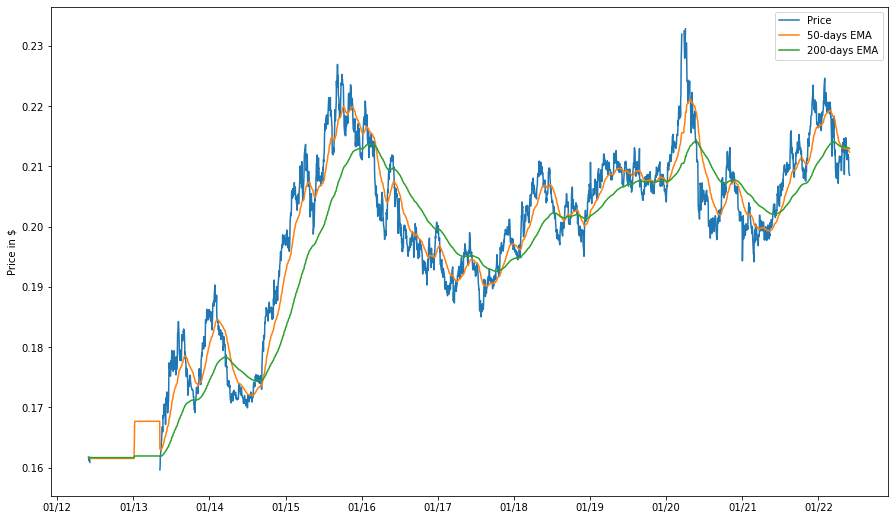

In [444]:
date_index = pd.to_datetime(fx_df.loc[:].index, format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(15,9))
# fx_df = fx_df[(np.abs(stats.zscore(fx_df)) < 3).all(axis=1)]

ax.plot(date_index, fx_df.loc[:, ticker], label='Price')
ax.plot(date_index, ema_short.loc[:, ticker], label = '50-days EMA')
ax.plot(date_index, ema_long.loc[:, ticker], label = '200-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [461]:
trading_positions_raw = ema_short - ema_long
# trading_positions_raw[trading_positions_raw < 0] = 0
# trading_positions_raw[trading_positions_raw > 0] = 1
# trading_positions = trading_positions_raw
trading_positions = trading_positions_raw.apply(np.sign) 
trading_positions_final = trading_positions.shift(1)
trading_positions_final

,ALL=X,DZD=X,XCD=X,BDT=X,BZD=X,INR=X,BOB=X,BWP=X,NOK=X,BIF=X,...,THBCHF=X,TTDUSD=X,TRYUSD=X,UGXUSD=X,UAHUSD=X,AEDNZD=X,AEDJPY=X,AEDZAR=X,UYUUSD=X,VNDUSD=X
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-01,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
2012-06-04,1.0,1.0,0.0,-1.0,NaN,-1.0,NaN,NaN,1.0,-1.0,...,1.0,1.0,-1.0,1.0,NaN,-1.0,NaN,-1.0,-1.0,1.0
2012-06-05,-1.0,1.0,0.0,-1.0,NaN,-1.0,0.0,NaN,1.0,-1.0,...,1.0,1.0,-1.0,1.0,NaN,-1.0,NaN,1.0,-1.0,1.0
2012-06-06,-1.0,1.0,0.0,-1.0,NaN,-1.0,1.0,NaN,1.0,-1.0,...,1.0,1.0,-1.0,1.0,NaN,-1.0,NaN,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24,1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0
2022-05-25,1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0
2022-05-26,1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0


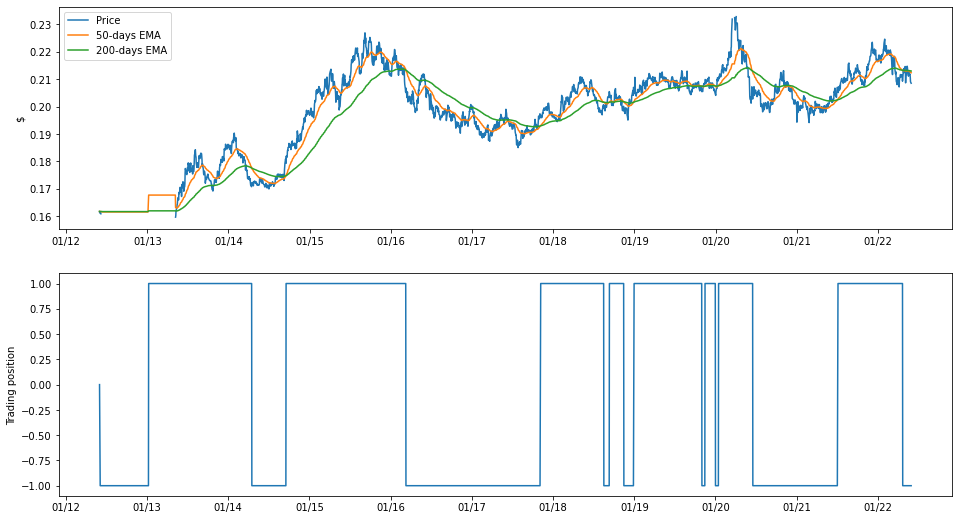

In [446]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, fx_df.loc[:, ticker], label='Price')
ax1.plot(date_index, ema_short.loc[:, ticker], label = '50-days EMA')
ax1.plot(date_index, ema_long.loc[:, ticker], label = '200-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final.loc[:,ticker], label='Trading position')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [457]:
asset_log_returns = np.log(fx_df).diff()
raw_return = asset_log_returns*trading_positions_final
cum_return = raw_return.cumsum()
rel_cum_return = np.exp(cum_return) - 1


Date
2012-05-31     0.000000
2012-06-01     0.000000
2012-06-04     0.153198
2012-06-05    -1.113304
2012-06-06    -1.655815
                ...    
2022-05-24    69.410787
2022-05-25    69.429651
2022-05-26    69.979078
2022-05-27    69.590503
2022-05-30    70.239165
Length: 2604, dtype: float64

In [462]:
hold_return = asset_log_returns*1
# hold_return[:200] = np.nan
hold_cum_return = hold_return.cumsum()
rel_hold_cum_return = np.exp(hold_cum_return) - 1

In [463]:
raw_return_all = asset_log_returns*trading_positions_final/tickers
cum_return_all = raw_return_all.cumsum()
rel_cum_return_all = np.exp(cum_return_all) - 1
total_rel_cum_return_all = rel_cum_return_all.sum(axis=1)
hold_return_all = asset_log_returns*1/tickers
hold_cum_return_all = hold_return_all.cumsum()
rel_hold_cum_return_all = np.exp(hold_cum_return_all) - 1
total_rel_hold_cum_return_all = rel_hold_cum_return_all.sum(axis=1)/tickers

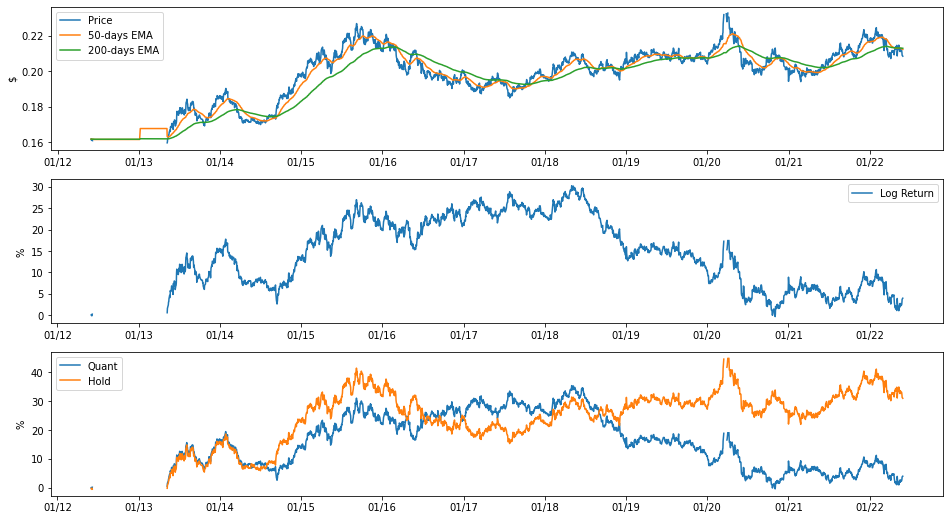

In [465]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,9))

ax1.plot(date_index, fx_df.loc[:, ticker], label='Price')
ax1.plot(date_index, ema_short.loc[:, ticker], label = '50-days EMA')
ax1.plot(date_index, ema_long.loc[:, ticker], label = '200-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, 100*cum_return[ticker], label="Log Return")

ax2.set_ylabel('%')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

ax3.plot(date_index, 100*rel_cum_return[ticker], label="Quant")
ax3.plot(date_index, 100*rel_hold_cum_return[ticker], label="Hold")

ax3.set_ylabel('%')
ax3.legend(loc='best')
ax3.xaxis.set_major_formatter(my_year_month_fmt)

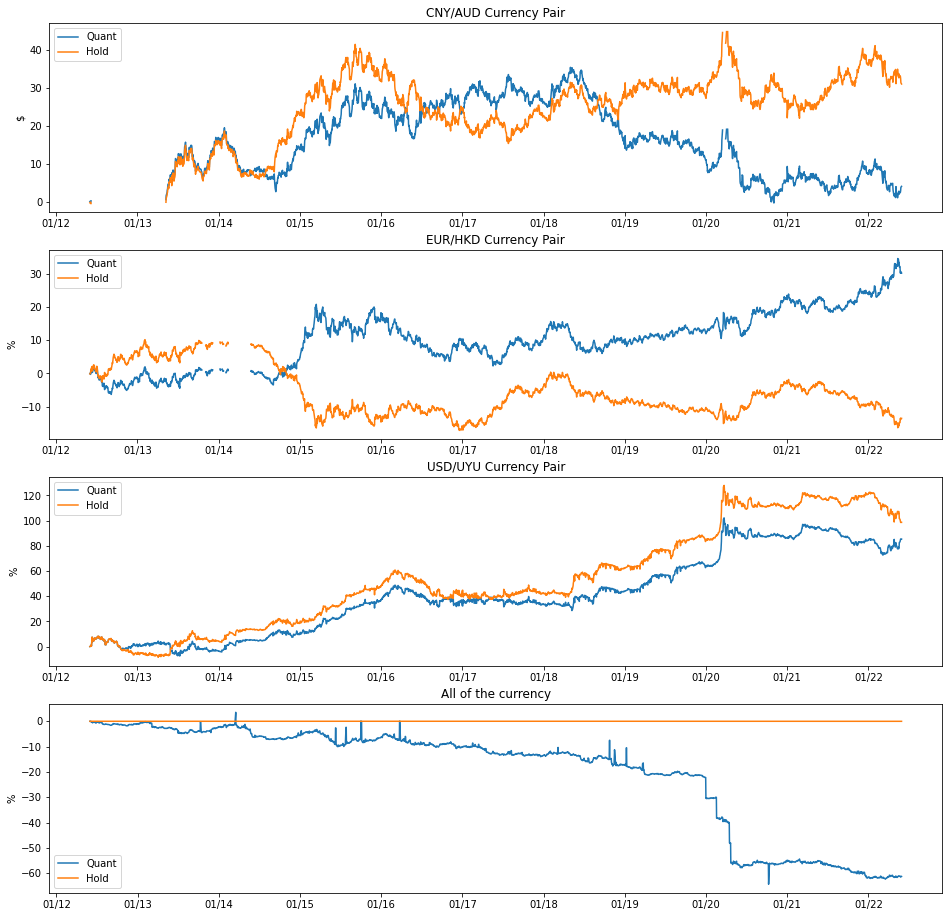

In [466]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,16))

ax1.set_title('CNY/AUD Currency Pair')
ax1.plot(date_index, 100*rel_cum_return['CNYAUD=X'], label="Quant")
ax1.plot(date_index, 100*rel_hold_cum_return['CNYAUD=X'], label="Hold")

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.set_title('EUR/HKD Currency Pair')
ax2.plot(date_index, 100*rel_cum_return['EURHKD=X'], label="Quant")
ax2.plot(date_index, 100*rel_hold_cum_return['EURHKD=X'], label="Hold")

ax2.set_ylabel('%')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

ax3.set_title('USD/UYU Currency Pair')
ax3.plot(date_index, 100*rel_cum_return['USDUYU=X'], label="Quant")
ax3.plot(date_index, 100*rel_hold_cum_return['USDUYU=X'], label="Hold")

ax3.set_ylabel('%')
ax3.legend(loc='best')
ax3.xaxis.set_major_formatter(my_year_month_fmt)

ax4.set_title('All of the currency')
ax4.plot(date_index, 100*total_rel_cum_return_all, label="Quant")
ax4.plot(date_index, 100*total_rel_hold_cum_return_all, label="Hold")

ax4.set_ylabel('%')
ax4.legend(loc='best')
ax4.xaxis.set_major_formatter(my_year_month_fmt)

# Crypto data

In [482]:
#Data reading & cleaning
crypto_df = pd.read_csv("crypto.csv", error_bad_lines = False)
crypto_df['Date'] = pd.to_datetime(crypto_df["Date"], format='%Y-%m-%d')
date = crypto_df["Date"].to_list()
crypto_df.drop(crypto_df.columns[0], axis=1, inplace=True)
crypto_df.set_index("Date", inplace=True)
#crypto_df.index.name = None
crypto_df

,1INCHBTC,1INCHBUSD,1INCHDOWNUSDT,1INCHUPUSDT,1INCHUSDT,AAVEBKRW,AAVEBNB,AAVEBRL,AAVEBTC,AAVEBUSD,...,ZILBNB,ZILBTC,ZILBUSD,ZILETH,ZILUSDT,ZRXBNB,ZRXBTC,ZRXBUSD,ZRXETH,ZRXUSDT
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,0.000029,0.872,NaN,NaN,0.874,NaN,0.3585,NaN,0.003603,107.0,...,0.000168,0.000002,0.04994,0.000028,0.04998,NaN,0.000013,0.3949,0.000223,0.3941
2022-06-04,0.000029,0.869,NaN,NaN,0.870,NaN,0.3546,NaN,0.003579,106.7,...,0.000167,0.000002,0.05020,0.000028,0.05024,NaN,0.000013,0.3945,0.000218,0.3948
2022-06-05,0.000029,0.858,NaN,NaN,0.859,NaN,0.3476,NaN,0.003465,103.7,...,0.000167,0.000002,0.05002,0.000028,0.05005,NaN,0.000014,0.4067,0.000226,0.4073


In [483]:
ema_short, sma_short, ema_long, sma_long = ma_generator(crypto_df, short_MA, long_MA)

In [484]:
tickers = len(crypto_df.columns.values.tolist())
date = list(crypto_df.index.values)
tickers

1674

In [485]:
ticker= 'ETHUSDT'

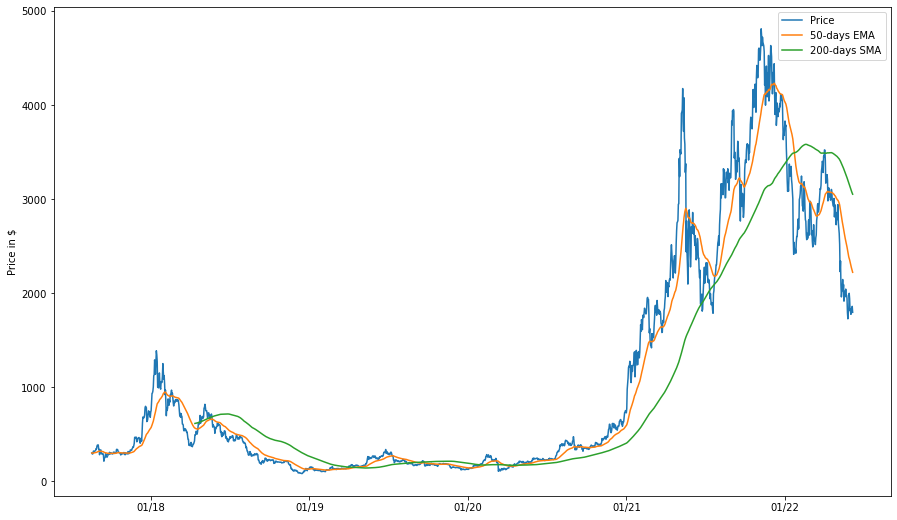

In [486]:
date_index = pd.to_datetime(crypto_df.loc[:].index, format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(15,9))


ax.plot(date_index, crypto_df.loc[:, ticker], label='Price')
ax.plot(date_index, ema_short.loc[:, ticker], label = '50-days EMA')
ax.plot(date_index, sma_long.loc[:, ticker], label = '200-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [590]:
trading_positions_raw = crypto_df - sma_long
# trading_positions_raw[trading_positions_raw < 0] = 0
# trading_positions_raw[trading_positions_raw > 0] = 1
# trading_positions = trading_positions_raw
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions_final = trading_positions.shift(1)
trading_positions_final

,1INCHBTC,1INCHBUSD,1INCHDOWNUSDT,1INCHUPUSDT,1INCHUSDT,AAVEBKRW,AAVEBNB,AAVEBRL,AAVEBTC,AAVEBUSD,...,ZILBNB,ZILBTC,ZILBUSD,ZILETH,ZILUSDT,ZRXBNB,ZRXBTC,ZRXBUSD,ZRXETH,ZRXUSDT
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,-1.0,-1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,NaN,-1.0,-1.0,1.0,-1.0
2022-06-04,-1.0,-1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,NaN,-1.0,-1.0,-1.0,-1.0
2022-06-05,-1.0,-1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,NaN,-1.0,-1.0,-1.0,-1.0


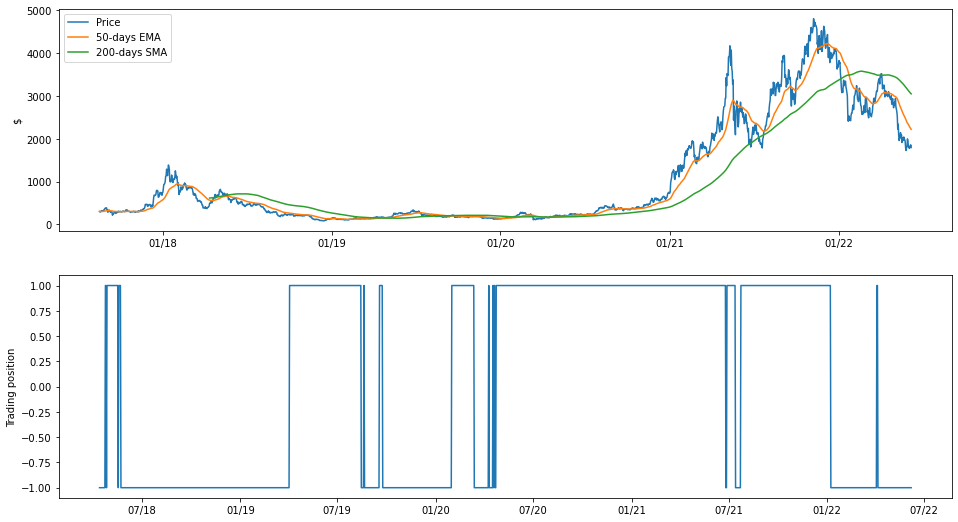

In [591]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, crypto_df.loc[:, ticker], label='Price')
ax1.plot(date_index, ema_short.loc[:, ticker], label = '50-days EMA')
ax1.plot(date_index, sma_long.loc[:, ticker], label = '200-days SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final.loc[:,ticker], label='Trading position')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [592]:
asset_log_returns = np.log(crypto_df).diff()
raw_return = asset_log_returns*trading_positions_final
cum_return = raw_return.cumsum()
rel_cum_return = np.exp(cum_return) - 1

In [593]:
hold_return = asset_log_returns
hold_return[:276] = np.nan
hold_cum_return = hold_return.cumsum()
hold_relative_cum_return = np.exp(hold_cum_return) - 1

In [596]:
raw_return_all = asset_log_returns*trading_positions_final/tickers
cum_return_all = raw_return_all.cumsum()
rel_cum_return_all = np.exp(cum_return_all) - 1
total_rel_cum_return_all = rel_cum_return_all.sum(axis=1)
hold_return_all = asset_log_returns*1/tickers
hold_cum_return_all = hold_return_all.cumsum()
rel_hold_cum_return_all = np.exp(hold_cum_return_all) - 1
total_rel_hold_cum_return_all = rel_hold_cum_return_all.sum(axis=1)
total_rel_cum_return_all

Date
2017-07-14    0.000000
2017-07-15    0.000000
2017-07-16    0.000000
2017-07-17    0.000000
2017-07-18    0.000000
                ...   
2022-06-03    0.133991
2022-06-04    0.125579
2022-06-05    0.126487
2022-06-06    0.115109
2022-06-07    0.124932
Length: 1793, dtype: float64

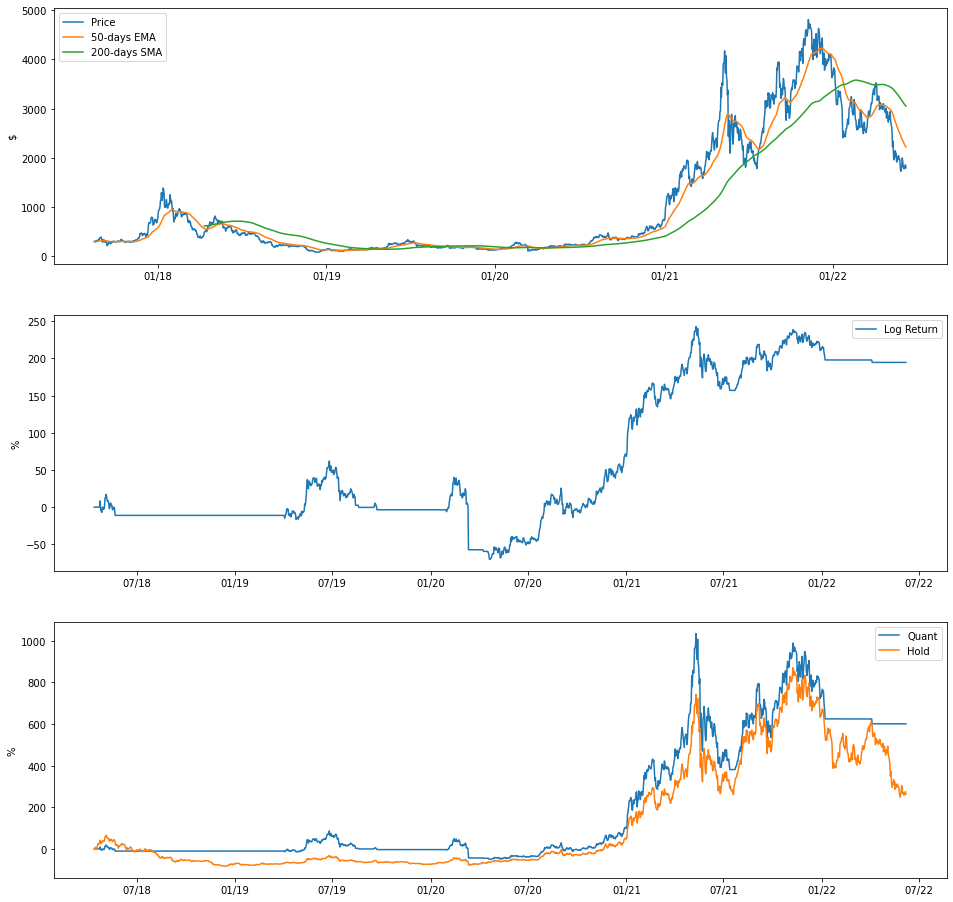

In [589]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))

ax1.plot(date_index, crypto_df.loc[:, ticker], label='Price')
ax1.plot(date_index, ema_short.loc[:, ticker], label = '50-days EMA')
ax1.plot(date_index, sma_long.loc[:, ticker], label = '200-days SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, 100*cum_return[ticker], label="Log Return")

ax2.set_ylabel('%')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

ax3.plot(date_index, 100*rel_cum_return[ticker], label="Quant")
ax3.plot(date_index, 100*hold_relative_cum_return[ticker], label="Hold")

ax3.set_ylabel('%')
ax3.legend(loc='best')
ax3.xaxis.set_major_formatter(my_year_month_fmt)

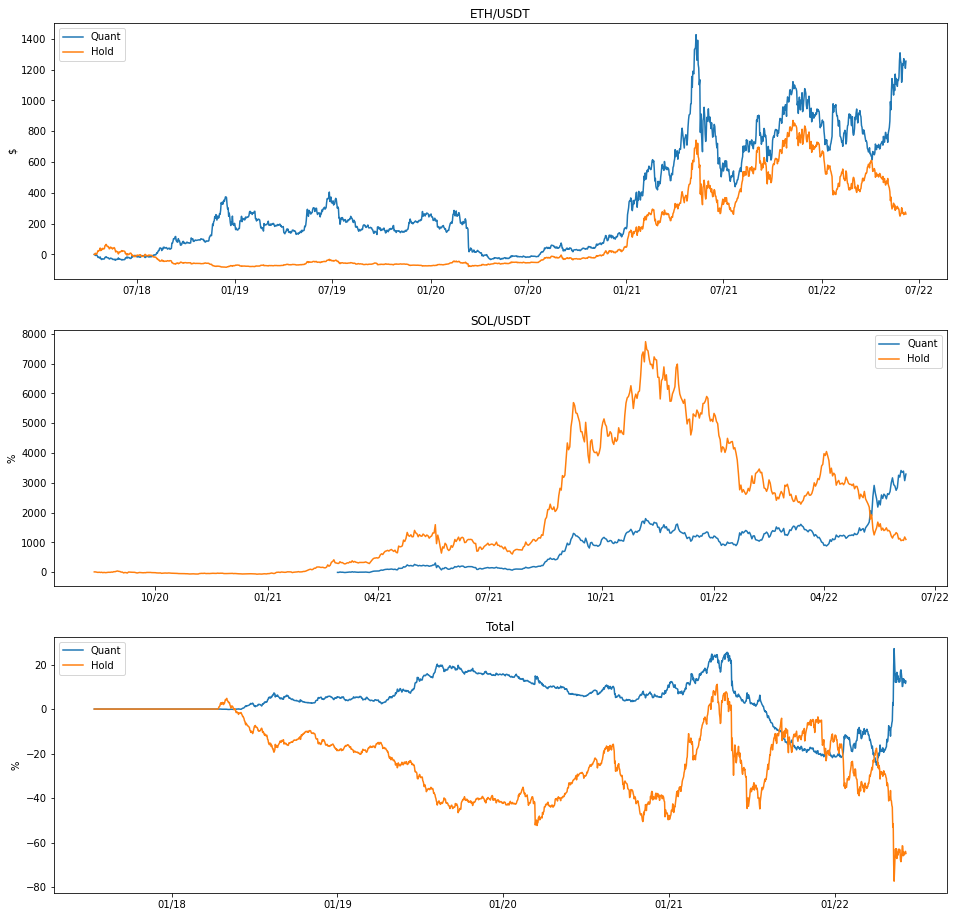

In [595]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))

ax1.set_title('ETH/USDT')
ax1.plot(date_index, 100*rel_cum_return[ticker], label="Quant")
ax1.plot(date_index, 100*hold_relative_cum_return[ticker], label="Hold")

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.set_title('SOL/USDT')
ax2.plot(date_index, 100*rel_cum_return['SOLUSDT'], label="Quant")
ax2.plot(date_index, 100*hold_relative_cum_return['SOLUSDT'], label="Hold")

ax2.set_ylabel('%')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

ax3.set_title('Total')
ax3.plot(date_index, 100*total_rel_cum_return_all, label="Quant")
ax3.plot(date_index, 100*total_rel_hold_cum_return_all, label="Hold")

ax3.set_ylabel('%')
ax3.legend(loc='best')
ax3.xaxis.set_major_formatter(my_year_month_fmt)

# Russell2000 data

In [4]:
#Data reading & cleaning
russell_df = pd.read_csv("russell2000pvdata.csv", error_bad_lines = False)
universesize=2000
vars = ['open', 'high', 'low', 'close', 'volume']
rawdata = {}
for tvar in vars:
    rawdata[tvar] = russell_df.loc[:, ['tickerid', 'ticker', 'date', tvar]]
    rawdata[tvar] = rawdata[tvar].pivot(index = 'date', columns = 'ticker', values = tvar)
    rawdata[tvar] = rawdata[tvar].iloc[:, :universesize]
closing_data = rawdata['close']
closing_data.dropna(axis=1, inplace=True)
closing_data

b'Skipping line 109845: expected 8 fields, saw 11\n'


ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,29.590000,8.586667,57.250000,10.920000,129.00,18.100000,26.760000,5.99,8.75,9.066667,...,58.070000,122.800003,22.309999,17.730000,27.940001,47.759998,4.83,4.49,28.830000,0.55
20101228,29.590000,8.524444,56.500000,10.960000,124.50,17.820000,26.790001,5.95,8.71,9.133333,...,58.279999,95.000000,22.260000,17.750000,27.719999,45.119999,4.71,4.26,28.650000,0.55
20101229,29.790001,8.548148,56.810001,11.070000,123.50,18.450001,26.730000,6.00,8.75,9.203333,...,58.509998,102.000000,22.340000,17.580000,28.469999,44.480000,4.75,4.28,28.209999,0.58
20101230,29.730000,8.548148,56.490002,10.740000,122.50,18.799999,26.600000,5.88,8.77,9.146667,...,59.020000,106.599998,22.100000,17.309999,28.860001,46.400002,4.77,4.31,27.709999,0.62
20101231,29.840000,8.358519,55.830002,10.540000,124.00,18.480000,26.299999,5.96,8.52,8.956667,...,58.419998,102.599998,22.150000,17.290001,28.680000,45.360001,4.66,4.27,26.870001,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,59.939999,64.839996,56.000000,38.590000,1.60,147.649994,40.610001,14.73,9.02,38.990002,...,18.559999,41.439999,19.980000,47.689999,15.200000,20.299999,2.97,7.53,38.410000,14.25
20201218,60.779999,64.320000,55.270000,37.799999,1.54,142.600006,39.930000,14.21,8.95,38.540001,...,16.870001,45.560001,20.440001,47.259998,13.950000,19.990000,2.89,8.41,37.910000,14.00
20201221,60.049999,64.239998,55.389999,36.669998,1.55,141.460007,38.700001,13.79,8.65,38.090000,...,17.379999,45.610001,20.040001,46.020000,13.470000,20.209999,2.80,8.33,36.630001,13.94


In [5]:
ema_short, sma_short, ema_long, sma_long = ma_generator(closing_data, short_MA, long_MA)

In [26]:
tickers = closing_data.columns.values.tolist()
date = list(closing_data.index.values)
ticker = 'XOMA'
start_date = '20100101'
end_date = '20201223'

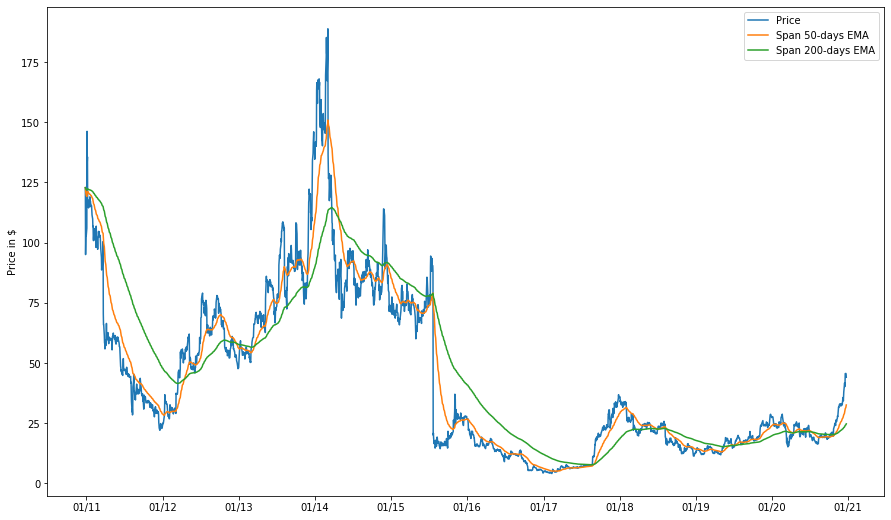

In [27]:
date_index = pd.to_datetime(closing_data.loc[start_date:end_date].index, format='%Y%m%d')
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(date_index, closing_data.loc[start_date:end_date, ticker], label='Price')
ax.plot(date_index, ema_short.loc[start_date:end_date, ticker], label = 'Span 50-days EMA')
ax.plot(date_index, ema_long.loc[start_date:end_date, ticker], label = 'Span 200-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [28]:
trading_positions_raw = ema_short - ema_long
trading_positions = trading_positions_raw.apply(np.sign) * 1
trading_positions_final = trading_positions.shift(1)
trading_positions_final

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20101229,0.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
20101230,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
20101231,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
20201218,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
20201221,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


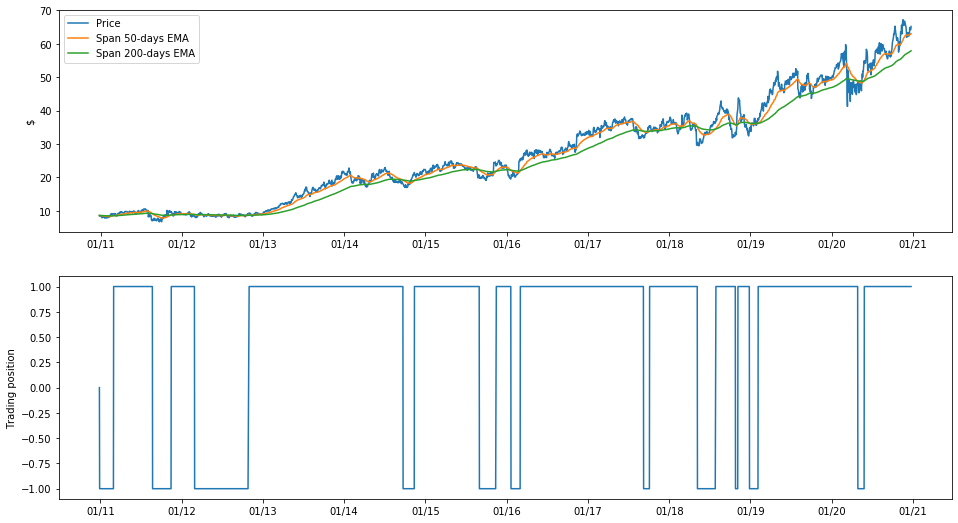

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, closing_data.loc[start_date:end_date,'AAON'], label='Price')
ax1.plot(date_index, ema_short.loc[start_date:end_date, 'AAON'], label = 'Span 50-days EMA')
ax1.plot(date_index, ema_long.loc[start_date:end_date, 'AAON'], label = 'Span 200-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final.loc[start_date:end_date, 'AAON'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [30]:
asset_log_returns = np.log(closing_data).diff()
raw_return = asset_log_returns*trading_positions_final
cum_return = raw_return.cumsum()
rel_cum_return = np.exp(cum_return) - 1
total_cum_return = cum_return.sum(axis=1)
total_rel_cum_return = rel_cum_return.sum(axis=1)
total_rel_cum_return

date
20101227       0.000000
20101228       0.000000
20101229      -0.386070
20101230      -0.295818
20101231       2.607087
               ...     
20201217    2355.364437
20201218    2382.108395
20201221    2408.457427
20201222    2493.511804
20201223    2525.979069
Length: 2517, dtype: float64

In [31]:
hold_return = asset_log_returns * 1
hold_cum_return = hold_return.cumsum()
hold_relative_return = np.exp(hold_cum_return) - 1
hold_total_return = hold_relative_return.sum(axis=1)

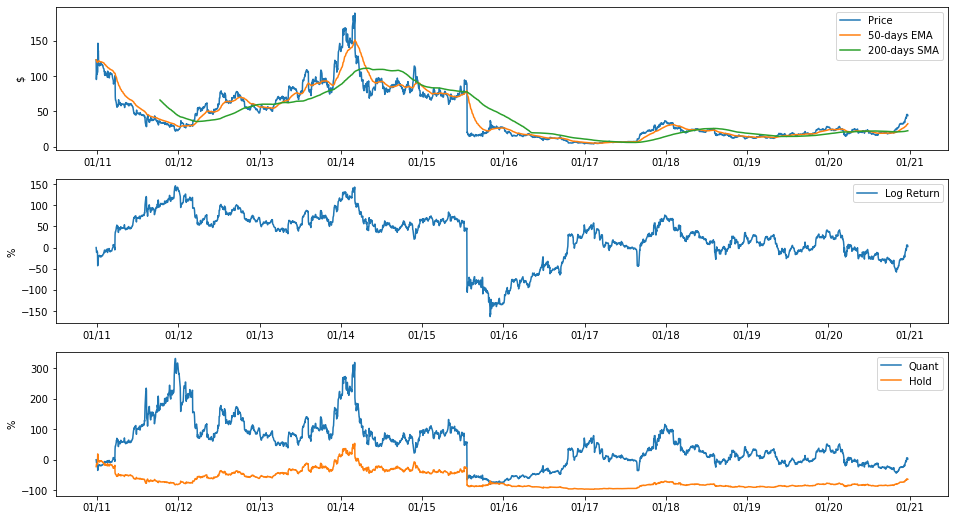

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,9))

date_index = pd.to_datetime(closing_data.loc[start_date:end_date].index, format='%Y%m%d')
ax1.plot(date_index, closing_data.loc[start_date:end_date, ticker], label='Price')
ax1.plot(date_index, ema_short.loc[start_date:end_date, ticker], label = '50-days EMA')
ax1.plot(date_index, sma_long.loc[start_date:end_date, ticker], label = '200-days SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, 100*cum_return.loc[start_date:end_date,ticker], label="Log Return")

ax2.set_ylabel('%')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

ax3.plot(date_index, 100*rel_cum_return.loc[start_date:end_date,ticker], label="Quant")
ax3.plot(date_index, 100*hold_relative_return.loc[start_date:end_date,ticker], label="Hold")

ax3.set_ylabel('%')
ax3.legend(loc='best')
ax3.xaxis.set_major_formatter(my_year_month_fmt)